[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmirMardan/deep-learning-algorithms/blob/main/0_img_segmentation/1_unet_carvana/run_colab.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_path = "/content/drive/MyDrive/Colab/unet/2_unet_multiclass/"
import sys
sys.path.append(project_path)

In [3]:
from unet import UNet
import matplotlib.pyplot as plt 
import torch
import pandas as pd
import tools
import torch 
import matplotlib.pyplot as plt
from default_values import *
from data_scripts.dataset import get_loaders

import torch.nn.functional as F


In [4]:
# !bash {project_path + "data_scripts/download_data.sh"}  


In [5]:
EPOCHS = 10
data_dir = "/content/data/lyft_udacity"
!python {project_path + "train.py --epochs " + str(EPOCHS) + " --data_dir " + data_dir}

100% 250/250 [02:36<00:00,  1.59it/s, loss=0.269]
Got 183235004/192000000 with accuracy 95.43
Dice score: 0.8859848380088806
Epoch 1: 
train loss: 0.5053468773365021 
validation loss: 0.3037571310997009
100% 250/250 [02:19<00:00,  1.79it/s, loss=0.263]
== Checkpoint is saved! ==
Got 185042442/192000000 with accuracy 96.38
Dice score: 0.909539520740509
Epoch 2: 
train loss: 0.2674083107709885 
validation loss: 0.24223025143146515
100% 250/250 [02:19<00:00,  1.80it/s, loss=0.211]
Got 185430796/192000000 with accuracy 96.58
Dice score: 0.914595901966095
Epoch 3: 
train loss: 0.23615880656242372 
validation loss: 0.2268483191728592
100% 250/250 [02:17<00:00,  1.82it/s, loss=0.218]
== Checkpoint is saved! ==
Got 185843202/192000000 with accuracy 96.79
Dice score: 0.919941246509552
Epoch 4: 
train loss: 0.21957939684391023 
validation loss: 0.2093476504087448
100% 250/250 [02:19<00:00,  1.80it/s, loss=0.206]
Got 185973856/192000000 with accuracy 96.86
Dice score: 0.9215869903564453
Epoch 5: 

In [6]:
metrics = pd.read_csv(project_path +"/checkpoints/metrics.csv")

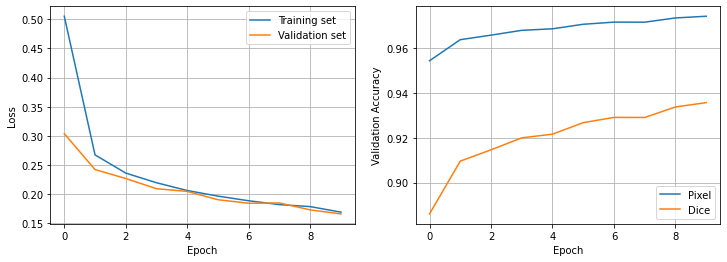

In [7]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.plot(metrics.train_loss, label="Training set")
ax.plot(metrics.valid_loss, label="Validation set")
ax.grid()
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
plt.legend()

ax = fig.add_subplot(122)
ax.plot(metrics.pixel_accuracy, label="Pixel")
ax.plot(metrics.dice_accuracy, label="Dice")
ax.set_ylabel("Validation Accuracy")
ax.set_xlabel("Epoch")
ax.grid()
leg = plt.legend()

# ax = fig.add_subplot(133)
# ax.plot(metrics.learning_rate)
# ax.set_ylabel("Learning Rate")
# ax.set_xlabel("Epoch")
# ax.grid()


In [8]:
tools.seed_everything(10)

unet = UNet(N_CHANNELS, OUT_CHANNELS,
            FEATURES, False)

tools.load_checkpoint(unet,
                      file=project_path +f"./checkpoints/checkpoint_{EPOCHS}.tar",
                    device=DEVICE)

== Checkpoint is loaded! ==


In [9]:
base_dir = "/content/data/lyft_udacity"

train_dl, val_dl = get_loaders(
        base_dir=base_dir,
        img_height=IMAGE_HEIGHT,
        img_width=IMAGE_WIDTH,
        batch_size=BATCH_SIZE, 
        val_percentage=VAL_PERCENTAGE,
        p=0)

In [10]:
img, mask = next(iter(val_dl))

out = unet(img)
preds = F.softmax(out, dim=1)
preds = torch.argmax(preds, dim=1)

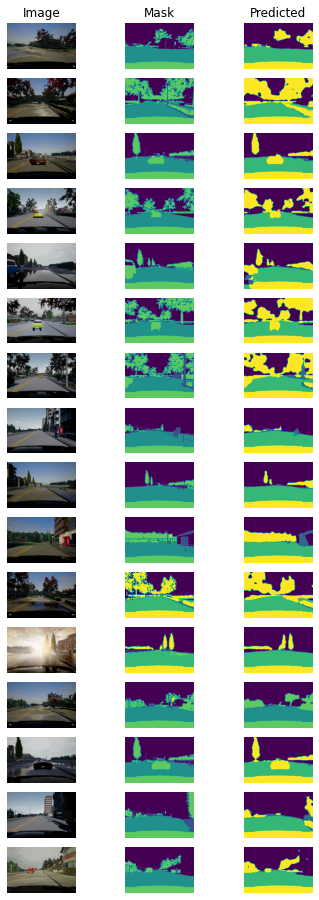

In [11]:
tools.show_batch(img, mask, BATCH_SIZE, val=preds)